In [1]:
# load required packages 
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
# matplotlib inline
import librosa

In [2]:
# load the first data set
fs, data = wavfile.read("C:/Users/heera/OneDrive - Heerak/Desktop/Dissertation/traindata/training-a/a0409.wav")

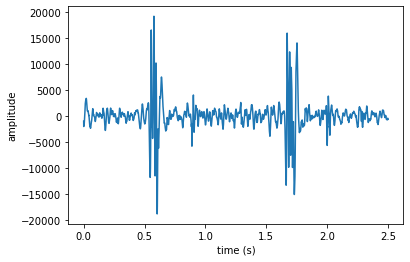

In [3]:
# visualize the first data set 
def plot_signal(data, fs, n_samples): 
    plt.plot((1./fs)*np.array(range(n_samples)), data[:n_samples])
    plt.xlabel("time (s)")
    plt.ylabel("amplitude")
    
plot_signal(data, fs, 5000)

In [4]:
# load the first data set
fs, data = wavfile.read("C:/Users/heera/OneDrive - Heerak/Desktop/Dissertation/traindata/training-a/a0402.wav")

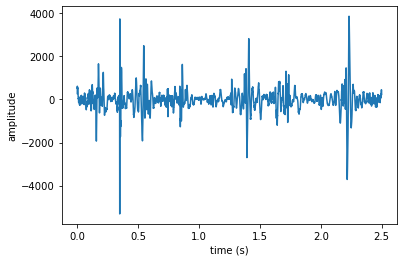

In [5]:
# visualize the first data set 
def plot_signal(data, fs, n_samples): 
    plt.plot((1./fs)*np.array(range(n_samples)), data[:n_samples])
    plt.xlabel("time (s)")
    plt.ylabel("amplitude")
    
plot_signal(data, fs, 5000)

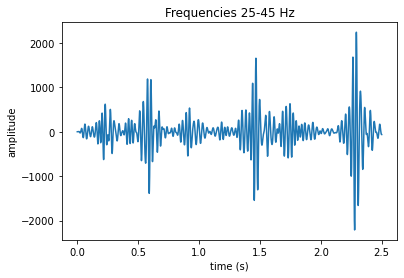

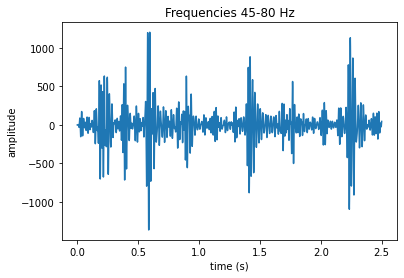

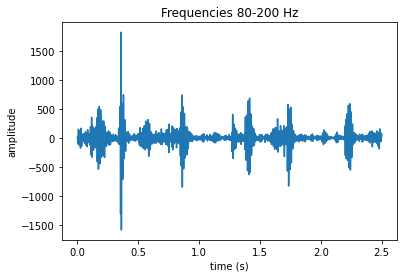

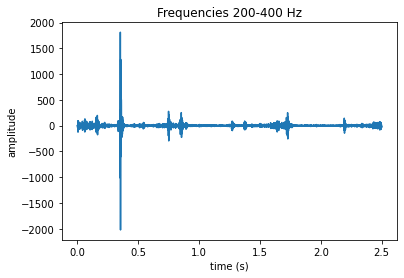

In [6]:
# decompose the signal based on frequency bands using Butterworth filter 

def butterworth_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butterworth_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butterworth_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def extract_frequency_bands(data, fs, filter_frequency_bands):
    data_filtered = np.zeros((len(data), 4))
    for k, band in enumerate(filter_frequency_bands):
        data_filtered[:, k] = butterworth_bandpass_filter(data, band[0], band[1], fs)
    return data_filtered

filter_frequency_bands = [(25, 45), (45, 80), (80, 200), (200, 400)]
data_filtered = extract_frequency_bands(data, fs, filter_frequency_bands)
for k in range(4):
    plot_signal(data_filtered[:, k], fs, 5000)
    plt.title("Frequencies %i-%i Hz"%filter_frequency_bands[k])
    plt.show()

In [7]:
def load_wave_file(path):
    wav, sr = librosa.load(path)
    return wav, sr

In [8]:
import os
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import pandas as pd
from sklearn.metrics import classification_report

In [9]:
wav_path = 'C:/Users/heera/OneDrive - Heerak/Desktop/Dissertation/traindata/training-a'
wav, sr = load_wave_file(wav_path+'/a0409.wav')
wav2, sr2 = load_wave_file(wav_path+'/a0408.wav')

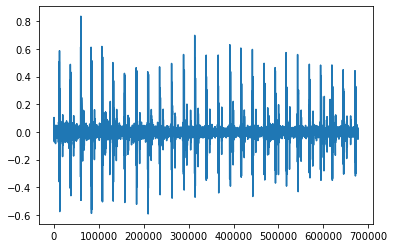

In [10]:
nor, sr = load_wave_file(wav_path+'/a0409.wav')
plt.plot(wav)

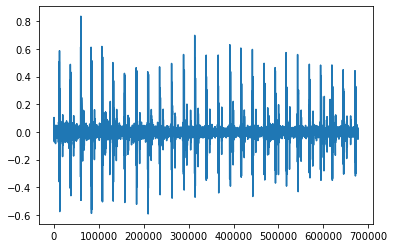

In [11]:
ab, sr = load_wave_file(wav_path+'/a0402.wav')
plt.plot(wav)

Text(0.5, 1.0, 'Abnormal Wave')

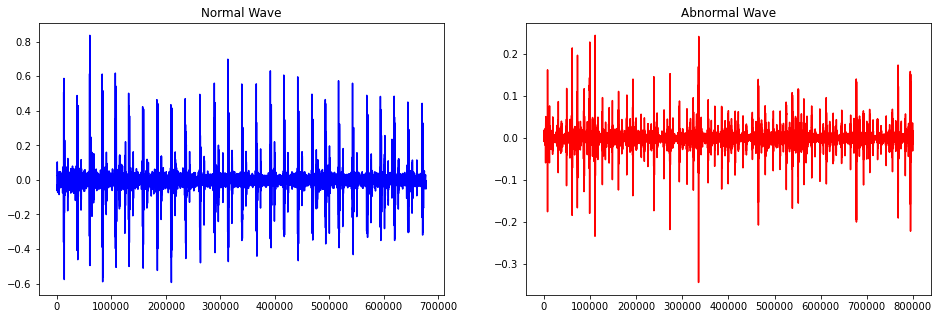

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(nor,color="b")
axes[0].set_title('Normal Wave')
axes[1].plot(ab,color="r")
axes[1].set_title('Abnormal Wave')

In [13]:
"""Zero Padding all files"""
def zero_pad_allfiles(files):
    pathfiles = list(map(lambda x: get_wave_path(x,wav_path),files))
    wave_files = []
    for file in pathfiles:
        wav, sr = load_wave_file(file)
        #pad by audio length
        wav_pad = zero_pad(wav, audio_len)  
        wave_files.append(wav_pad)
    return wave_files


"""Finds max length of all files"""
def get_max_len(files):
    maxL = 0
    for file in files:
        wav, sr = load_wav_file(file, wav_path)
        if len(wav) > maxL:
            maxL = len(wav)
    
    return maxL
